# Association Rule Assignment | Real Market Dataset

## Import Libraries

In [21]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

## Load the Dataset

In [22]:
df = pd.read_csv(r"C:\Ozy\Data Science\DS datasets\market.csv")
df.head()

,Bread,Honey,Bacon,Toothpaste,Banana,Apple,Hazelnut,Cheese,Meat,Carrot,...,Milk,Butter,ShavingFoam,Salt,Flour,HeavyCream,Egg,Olive,Shampoo,Sugar
0,1,0,1,0,1,1,1,0,0,1,...,0,0,0,0,0,1,1,0,0,1
1,1,1,1,0,1,1,1,0,0,0,...,1,1,0,0,1,0,0,1,1,0
2,0,1,1,1,1,1,1,1,1,0,...,1,0,1,1,1,1,1,0,0,1
3,1,1,0,1,0,1,0,0,0,0,...,1,0,0,0,1,0,1,1,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Basic Information of Dataset

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Bread        464 non-null    int64
 1   Honey        464 non-null    int64
 2   Bacon        464 non-null    int64
 3   Toothpaste   464 non-null    int64
 4   Banana       464 non-null    int64
 5   Apple        464 non-null    int64
 6   Hazelnut     464 non-null    int64
 7   Cheese       464 non-null    int64
 8   Meat         464 non-null    int64
 9   Carrot       464 non-null    int64
 10  Cucumber     464 non-null    int64
 11  Onion        464 non-null    int64
 12  Milk         464 non-null    int64
 13  Butter       464 non-null    int64
 14  ShavingFoam  464 non-null    int64
 15  Salt         464 non-null    int64
 16  Flour        464 non-null    int64
 17  HeavyCream   464 non-null    int64
 18  Egg          464 non-null    int64
 19  Olive        464 non-null    int64
 20  Shampoo   

## Checking Missing values in DataFrame

In [24]:
df.isnull().sum()

Bread          0
Honey          0
Bacon          0
Toothpaste     0
Banana         0
Apple          0
Hazelnut       0
Cheese         0
Meat           0
Carrot         0
Cucumber       0
Onion          0
Milk           0
Butter         0
ShavingFoam    0
Salt           0
Flour          0
HeavyCream     0
Egg            0
Olive          0
Shampoo        0
Sugar          0
dtype: int64

## Remove duplicates in DataFrame

In [25]:
df.drop_duplicates(inplace=True)

In [26]:
# Convert all columns to boolean (0 or 1)
df = df.astype(bool)

## Generate frequent itemsets

In [27]:
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.413567,(Bread)
1,0.420131,(Honey)
2,0.433260,(Bacon)
3,0.389497,(Toothpaste)
4,0.452954,(Banana)
...,...,...
4153,0.050328,"(Butter, ShavingFoam, Hazelnut, Onion, Bacon)"
4154,0.050328,"(Butter, Meat, Cheese, Onion, Bacon)"
4155,0.054705,"(Butter, Meat, ShavingFoam, Cheese, Bacon)"
4156,0.054705,"(Butter, ShavingFoam, Cheese, Onion, Bacon)"


## Generate association rules

In [28]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Honey),(Bread),0.420131,0.413567,0.203501,0.484375,1.171214,0.029749,1.137325,0.252100
1,(Bread),(Honey),0.413567,0.420131,0.203501,0.492063,1.171214,0.029749,1.141617,0.249278
2,(Bacon),(Bread),0.433260,0.413567,0.205689,0.474747,1.147934,0.026507,1.116479,0.227388
3,(Bread),(Bacon),0.413567,0.433260,0.205689,0.497354,1.147934,0.026507,1.127514,0.219752
4,(Toothpaste),(Bread),0.389497,0.413567,0.177243,0.455056,1.100321,0.016160,1.076135,0.149343
...,...,...,...,...,...,...,...,...,...,...
42955,(Butter),"(Cheese, Meat, ShavingFoam, Hazelnut)",0.380744,0.065646,0.050328,0.132184,2.013602,0.025334,1.076673,0.812874
42956,(Meat),"(Cheese, Butter, ShavingFoam, Hazelnut)",0.393873,0.076586,0.050328,0.127778,1.668413,0.020163,1.058691,0.660964
42957,(ShavingFoam),"(Cheese, Butter, Meat, Hazelnut)",0.411379,0.070022,0.050328,0.122340,1.747174,0.021523,1.059611,0.726523
42958,(Hazelnut),"(Cheese, Butter, ShavingFoam, Meat)",0.426696,0.067834,0.050328,0.117949,1.738792,0.021384,1.056816,0.741122


## Histogram for support vs confidence

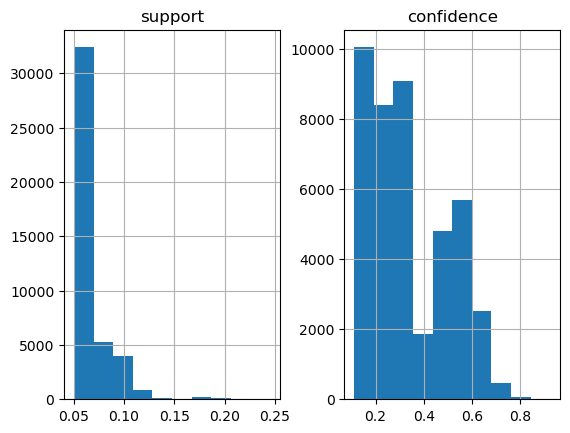

In [29]:
rules[['support', 'confidence']].hist()
plt.show()

## Scatter plot for support vs confidence

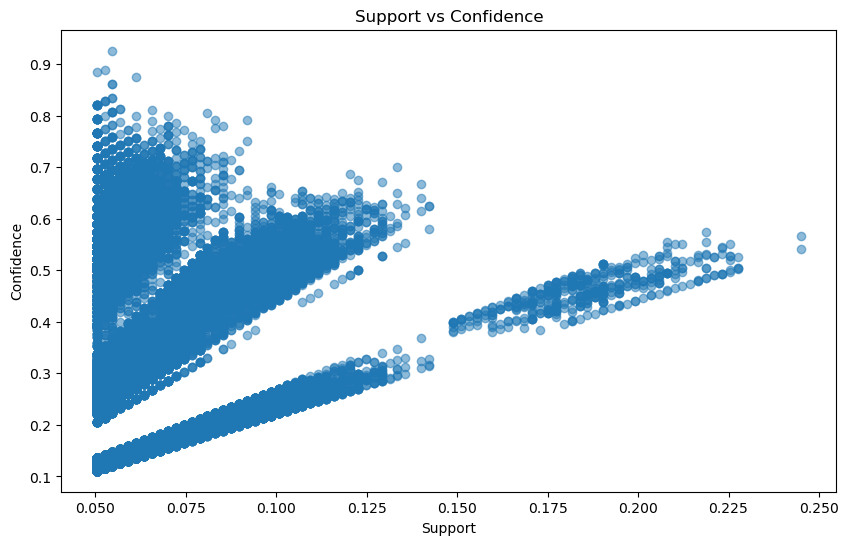

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

## Metrics and Visualizations

Histogram:
- Support Histogram: Shows the frequency distribution of the support values for the association rules which is above 30000
- Confidence Histogram: Shows the frequency distribution of the confidence values for the association rules which is around 10000

Support vs Confidence Scatter Plot:
- The scatter plot shows the relationship between support and confidence, highlighting rules with strong and reliable patterns.

## Key Findings:

- Support values indicate how frequently itemsets occur together, highlighting common item combinations.
- Confidence values illustrate the strength of relationships between antecedents and consequents in the rules.
- Identified frequent itemsets and strong association rules that reveal common purchasing patterns.
- Visualizations provided clear insights into the distribution of support and confidence metrics, helping in understanding customer behavior.

## Effectiveness
- The association rule mining analysis on the real market data successfully uncovered meaningful insights into customer purchasing behavior. By leveraging strong association rules, businesses can optimize strategies to improve sales and customer satisfaction effectively.